# Correlation Analysis

In [2]:
%cd ../..
from src.data.files import Data
from src.data.synthesizer import MachineSignalSynth, LinearSingleStepMultiMachine, OptLinearSingleStepMultiMachine
import pandas as pd

/root/marching-penguin


In [3]:
all_events = Data.get_events()
tel = Data.get_telemetry()

In [4]:
synthesizer = MachineSignalSynth(tel, all_events, OptLinearSingleStepMultiMachine())
df = synthesizer.generate()

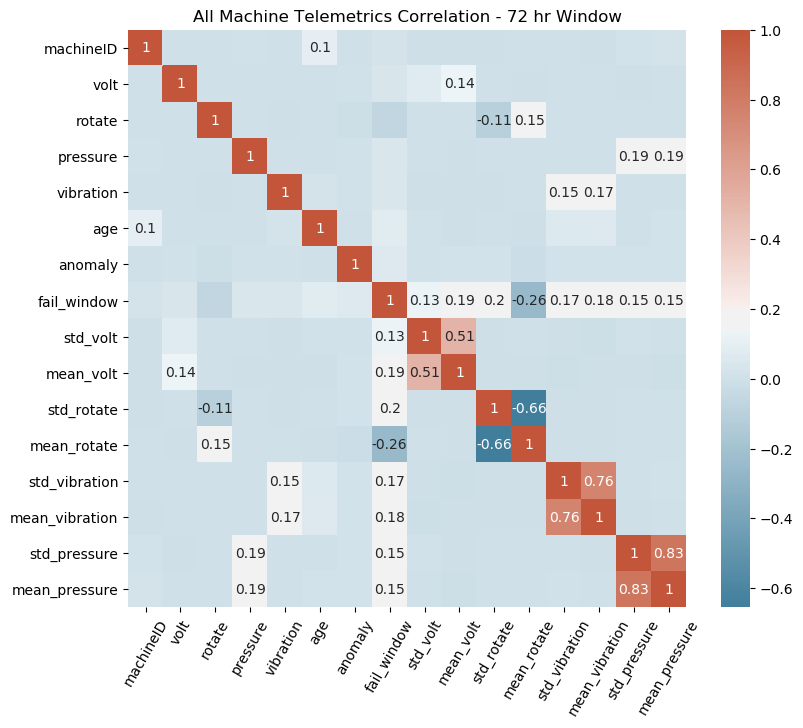

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
# Correlation between different variables
#
corr = df.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(9, 7.5))
#
# Generate a mask for upper traingle
#
# mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#|
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
ax = sns.heatmap(corr, annot=True,cmap=cmap)
ax.set(title="All Machine Telemetrics Correlation - 72 hr Window")

for t in ax.texts:
    if abs(float(t.get_text()))>=0.1:
        t.set_text(t.get_text())
    else:
        t.set_text("")

ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
plt.show()

In [6]:
corr["fail_window"]

machineID         0.021826
volt              0.037933
rotate           -0.060749
pressure          0.047371
vibration         0.047825
age               0.076311
anomaly           0.064483
fail_window       1.000000
std_volt          0.127229
mean_volt         0.185292
std_rotate        0.204578
mean_rotate      -0.260185
std_vibration     0.169558
mean_vibration    0.183093
std_pressure      0.150591
mean_pressure     0.151621
Name: fail_window, dtype: float64

In [7]:
all_events.loc[all_events["failure"] == True]

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4,maint_comp1,maint_comp2,maint_comp3,maint_comp4,error1,error2,error3,error4,error5,failure,maint,error,anomaly
96,2015-01-05 06:00:00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,True,True,False,True
1536,2015-03-06 06:00:00,1,1,0,0,0,1,0,0,0,0,0,0,0,0,True,True,False,True
2616,2015-04-20 06:00:00,1,0,1,0,0,0,1,0,0,0,0,0,0,0,True,True,False,True
4056,2015-06-19 06:00:00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,True,True,False,True
5856,2015-09-02 06:00:00,1,0,0,0,1,1,0,0,1,0,0,0,0,0,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866546,2015-11-29 06:00:00,99,0,0,1,0,0,0,1,0,0,0,0,0,0,True,True,False,True
866906,2015-12-14 06:00:00,99,0,0,0,1,0,0,0,1,0,0,0,0,0,True,True,False,True
868347,2015-02-12 06:00:00,100,1,0,0,0,1,0,0,0,0,0,0,0,0,True,True,False,True
873387,2015-09-10 06:00:00,100,1,0,0,0,1,0,0,0,0,0,0,0,0,True,True,False,True


In [8]:
corr["fail_window"]

machineID         0.021826
volt              0.037933
rotate           -0.060749
pressure          0.047371
vibration         0.047825
age               0.076311
anomaly           0.064483
fail_window       1.000000
std_volt          0.127229
mean_volt         0.185292
std_rotate        0.204578
mean_rotate      -0.260185
std_vibration     0.169558
mean_vibration    0.183093
std_pressure      0.150591
mean_pressure     0.151621
Name: fail_window, dtype: float64